In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import matplotlib as mpl

In [255]:
from sbi.utils import BoxUniform
from torch.distributions import biject_to
prior = BoxUniform(-torch.ones(2), torch.ones(2))

In [306]:
def is_in_support(theta):
    c1 = torch.logical_and(theta[:, 0] > -1, theta[:, 0] < 1)
    c2 = torch.logical_and(theta[:, 1] > -1, theta[:, 1] < 1)
    return torch.logical_and(c1, c2)

In [488]:
resolution = 100
x = torch.linspace(-2, 2, resolution)
X, Y = torch.meshgrid(x, x)
xy = torch.stack([X, Y])
xy = torch.reshape(xy, (2, resolution**2)).T
in_support_constrained = is_in_support(xy)
in_support_constrained = torch.reshape(in_support_constrained, (resolution, resolution))

In [489]:
_ = torch.manual_seed(9)
prior_samples = prior.sample((200,))
prior_samples = prior_samples[is_in_support(prior_samples)][:20]

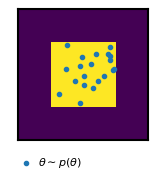

In [490]:
linecol = "r"
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
    _ = ax.imshow(in_support_constrained.numpy(), extent=(-2, 2, -2, 2))
    s = ax.scatter(prior_samples[:, 0].numpy(), prior_samples[:, 1].numpy())
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # ax.spines["bottom"].set_visible(False)
    # ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.legend([s], [r"$\theta \sim p(\theta)$"], loc="upper left", bbox_to_anchor=(-0.1, -0.04), handletextpad=0.1)
    plt.savefig("../svg/panel_appendix5_a.svg")

In [491]:
bijection = biject_to(prior.support)

In [492]:
resolution = 100
x = torch.linspace(-5, 5, resolution)
X, Y = torch.meshgrid(x, x)
xy = torch.stack([X, Y])
xy = torch.reshape(xy, (2, resolution**2)).T
in_support = is_in_support(bijection(xy))
in_support = torch.reshape(in_support, (resolution, resolution))

In [493]:
inverse_prior = bijection.inv(prior_samples)

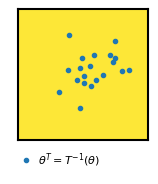

In [494]:
linecol = "r"
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
    _ = ax.imshow(in_support.numpy(), extent=(-5, 5, -5, 5), cmap="cividis_r")
    s = ax.scatter(inverse_prior[:, 0].numpy(), inverse_prior[:, 1].numpy())
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # ax.spines["bottom"].set_visible(False)
    # ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.legend([s], [r"$\theta^T  = T^{-1}(\theta)$"], loc="upper left", bbox_to_anchor=(-0.1, 0.0), handletextpad=0.1)
    plt.savefig("../svg/panel_appendix5_b.svg")

In [495]:
def is_in_support_unconstrained(theta):
    condition = torch.sum(theta**2, dim=1) < 14.0
    return condition

In [496]:
resolution = 100
x = torch.linspace(-5, 5, resolution)
X, Y = torch.meshgrid(x, x)
xy = torch.stack([X, Y])
xy = torch.reshape(xy, (2, resolution**2)).T
in_support = is_in_support_unconstrained(xy)
in_support = torch.reshape(in_support, (resolution, resolution))

In [497]:
leaking_dist = BoxUniform(-5*torch.ones(2), 5*torch.ones(2))
leaking_samples = leaking_dist.sample((100,))
leaking_samples = leaking_samples[torch.logical_not(is_in_support_unconstrained(leaking_samples))]
leaking_samples_standard = bijection(leaking_samples)

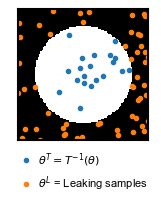

In [498]:
linecol = "r"
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
    _ = ax.imshow(in_support.numpy(), extent=(-5, 5, -5, 5), cmap="gray")
    s1 = ax.scatter(inverse_prior[:, 0].numpy(), inverse_prior[:, 1].numpy())
    s2 = ax.scatter(leaking_samples[:, 0].numpy(), leaking_samples[:, 1].numpy())
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # ax.spines["bottom"].set_visible(False)
    # ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.legend([s1, s2], [r"$\theta^T  = T^{-1}(\theta)$", r"$\theta^L$ = Leaking samples"], loc="upper left", bbox_to_anchor=(-0.1, 0.0), handletextpad=0.1)
    plt.savefig("../svg/panel_appendix5_c.svg")

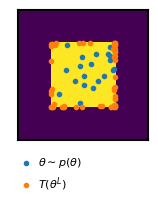

In [499]:
linecol = "r"
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.7, 1.7))
    _ = ax.imshow(in_support_constrained.numpy(), extent=(-2, 2, -2, 2))
    _ = ax.scatter(prior_samples[:, 0].numpy(), prior_samples[:, 1].numpy())
    _ = ax.scatter(leaking_samples_standard[:, 0].numpy(), leaking_samples_standard[:, 1].numpy())
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # ax.spines["bottom"].set_visible(False)
    # ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.legend([s1, s2], [r"$\theta \sim p(\theta)$", r"$T(\theta^L)$"], loc="upper left", bbox_to_anchor=(-0.1, -0.04), handletextpad=0.1)
    plt.savefig("../svg/panel_appendix5_d.svg")

In [500]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [501]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("15.7cm", "4.8cm",
    Panel(
          SVG("../svg/panel_appendix5_a.svg").scale(svg_scale),
          Text("a", 3.7, 2, **kwargs_text),
    ).move(-3.7, 10),
    Panel(
          SVG("../svg/panel_appendix5_b.svg").scale(svg_scale),
          Text("b", 3.7, 2, **kwargs_text),
    ).move(150.7, 10),
    Panel(
          SVG("../svg/panel_appendix5_c.svg").scale(svg_scale),
          Text("c", 3.7, 2, **kwargs_text),
    ).move(300.7, 10),
    Panel(
          SVG("../svg/panel_appendix5_d.svg").scale(svg_scale),
          Text("d", 3.7, 2, **kwargs_text),
    ).move(450.7, 10),
)

!mkdir -p fig
f.save("../fig/fig7_appendix5.svg")
svg('../fig/fig7_appendix5.svg')